In [ ]:
# test the column transformer
# num cols have mean=0 and std=1
# x = preprocessor.fit_transform(df)
# df_trans = pd.DataFrame(x, columns=preprocessor.get_feature_names_out())
# display(df_trans.describe())
# print(df_trans.shape)

steps = [("preprocessor", preprocessor), ("clf", RandomForestRegressor(max_depth=5))]

rf_pipeline = Pipeline(steps)

# Cross-validate the model
cross_val_scores = cross_val_score(rf_pipeline, X, y, cv=10, scoring="neg_mean_squared_error")

# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

rf_pipeline.fit(X, y)
# Get feature names after preprocessing
feature_names = rf_pipeline.named_steps["preprocessor"].get_feature_names_out()
# print(feature_names)
feature_importance = rf_pipeline.named_steps["clf"].feature_importances_


df = pd.DataFrame({"feature": feature_names, "importance": feature_importance}).sort_values(
    by="importance", ascending=False
)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df["feature"], df["importance"], color="skyblue")
plt.xlabel("Mean Feature Importance")
plt.title("Random Forest Regressor Feature Importances (Cross-Validated)")
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
# plt.show()
plt.savefig("feature_importances.png")  # Save the figure as a PNG image

# Save the fitted pipeline
joblib.dump(rf_pipeline, "./saved_models/model_pipeline.pkl")

# Later: Load it back
loaded_pipeline = joblib.load("./saved_models/model_pipeline.pkl")

# Use it for prediction
# y_pred = loaded_pipeline.predict(X_new)

In [49]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import mean_squared_error

TARGET_COL = "SalePrice"
TRAIN_PATH = "../processed_data/train_processed.csv"
TEST_PATH = "../processed_data/test_processed.csv"
MAX_DEPTH = 6

def load_dataset(filepath:str, target_col: str):
    df = pd.read_csv(filepath)
    X = df.drop(columns=[target_col])
    y = df[target_col]

    return X, y

if __name__ == "__main__":
    # load the training data
    X_train, y_train = load_dataset(TRAIN_PATH, TARGET_COL)
    print(df_train.shape)

    # Load the test data
    X_test, y_test = load_dataset(TEST_PATH, TARGET_COL)
    df_test = pd.read_csv("../processed_data/test_processed.csv")
    
    rf = RandomForestRegressor(max_depth=MAX_DEPTH)

    # Get the accuracy on the training data using cross validation
    cross_val_scores = cross_val_score(rf,X_train,y_train,cv=5,scoring="neg_mean_squared_error")
    # Print the 10-fold RMSE
    print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

    # Fit the model on the toal training data
    rf.fit(X_train, y_train)
    
    # Determine the accuracy on the test dataset
    y_pred = rf.predict(X_test)
    neg_mse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Negative MSE:", neg_mse)

    # TODO save the model

(1168, 62)
10-fold RMSE:  33911.20728674929
Negative MSE: 35901.660798385434


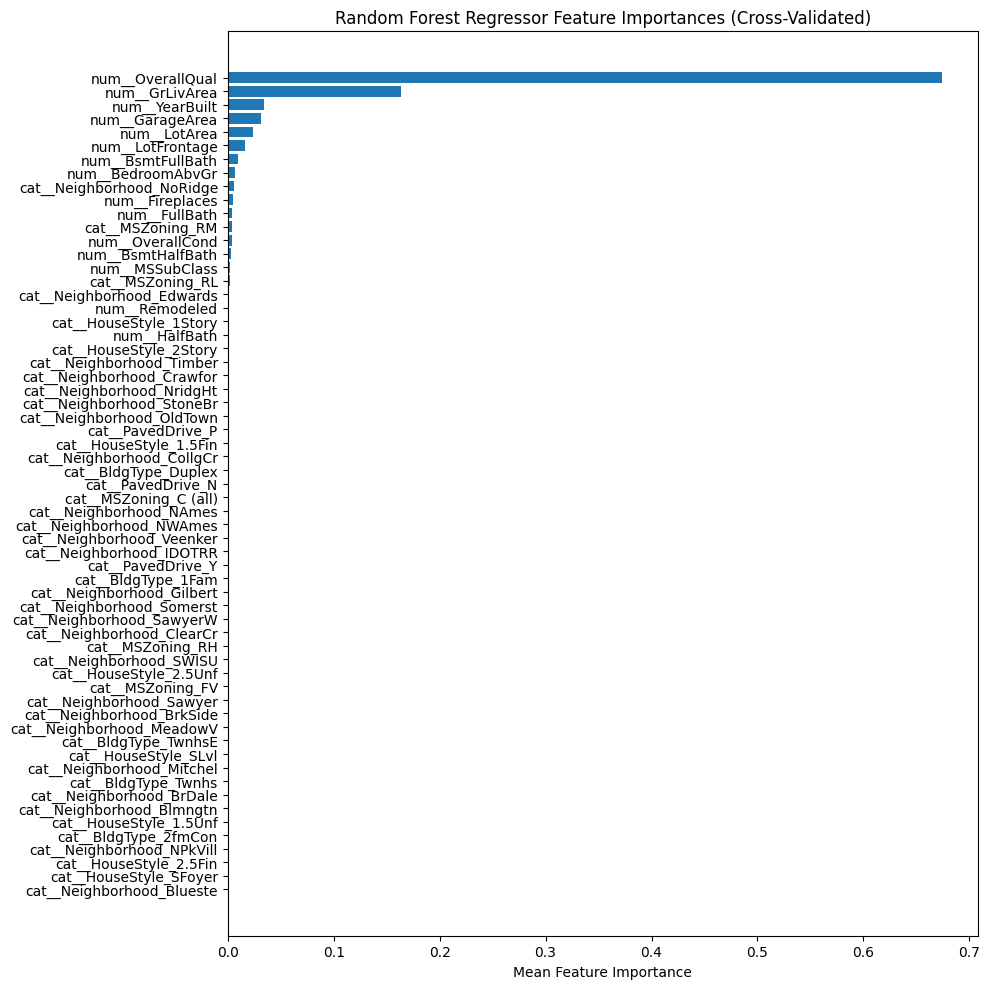

In [68]:
import matplotlib.pyplot as plt

data = {"feature": X_train.columns, "importance": rf.feature_importances_}
df = pd.DataFrame(data).sort_values(by=["importance"])
plt.figure(figsize=(10, 10))
plt.barh(y=df["feature"], width=df["importance"])
plt.xlabel("Mean Feature Importance")
plt.title("Random Forest Regressor Feature Importances (Cross-Validated)")
plt.tight_layout()
#plt.show()
plt.savefig("./artifacts/feature_importances.png")  # Save the figure as a PNG image



In [64]:
X_train.columns

Index(['num__MSSubClass', 'num__LotFrontage', 'num__LotArea',
       'num__OverallQual', 'num__OverallCond', 'num__YearBuilt',
       'num__Remodeled', 'num__GrLivArea', 'num__BsmtFullBath',
       'num__BsmtHalfBath', 'num__FullBath', 'num__HalfBath',
       'num__BedroomAbvGr', 'num__Fireplaces', 'num__GarageArea',
       'cat__MSZoning_C (all)', 'cat__MSZoning_FV', 'cat__MSZoning_RH',
       'cat__MSZoning_RL', 'cat__MSZoning_RM', 'cat__Neighborhood_Blmngtn',
       'cat__Neighborhood_Blueste', 'cat__Neighborhood_BrDale',
       'cat__Neighborhood_BrkSide', 'cat__Neighborhood_ClearCr',
       'cat__Neighborhood_CollgCr', 'cat__Neighborhood_Crawfor',
       'cat__Neighborhood_Edwards', 'cat__Neighborhood_Gilbert',
       'cat__Neighborhood_IDOTRR', 'cat__Neighborhood_MeadowV',
       'cat__Neighborhood_Mitchel', 'cat__Neighborhood_NAmes',
       'cat__Neighborhood_NPkVill', 'cat__Neighborhood_NWAmes',
       'cat__Neighborhood_NoRidge', 'cat__Neighborhood_NridgHt',
       'cat__Neigh

In [65]:
pd.DataFrame(data)

,feature,importance
0,num__MSSubClass,0.002084
1,num__LotFrontage,0.016288
2,num__LotArea,0.023608
3,num__OverallQual,0.674238
4,num__OverallCond,0.003722
...,...,...
56,cat__HouseStyle_SFoyer,0.000000
57,cat__HouseStyle_SLvl,0.000008
58,cat__PavedDrive_N,0.000271
59,cat__PavedDrive_P,0.000362


In [70]:
df.sort_values(by="importance")

,feature,importance
21,cat__Neighborhood_Blueste,0.000000e+00
56,cat__HouseStyle_SFoyer,0.000000e+00
53,cat__HouseStyle_2.5Fin,0.000000e+00
33,cat__Neighborhood_NPkVill,0.000000e+00
46,cat__BldgType_2fmCon,9.334834e-08
...,...,...
2,num__LotArea,2.360810e-02
14,num__GarageArea,3.095085e-02
5,num__YearBuilt,3.396609e-02
7,num__GrLivArea,1.632285e-01
